#### Objective of Analysis:

It's insightful in some cases to look at specific years, within specific regions to determine what could have created a deviation from a general trend (after examining the year by year trends).  This analysis takes each region, by year, and evaluates all of the parameters together.


Regions: 'NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'


- [1. NSW Region - 2006](#2006) 

- [2. NSW Region - 2007](#2007) 

- [3. NSW Region - 2008](#2008) 

- [4. NSW Region - 2009](#2009) 

- [5. NSW Region - 2010](#2010) 

- [6. NSW Region - 2011](#2011) 

- [7. NSW Region - 2012](#2012) 

- [8. NSW Region - 2013](#2013)  

- [9. NSW Region - 2014](#2014)  

- [10. NSW Region - 2015](#2015) 

- [11. NSW Region - 2016](#2016) 

- [12. NSW Region - 2017](#2017) 

- [13. NSW Region - 2018](#2018) 

- [13. NSW Region - 2019](#2019) 

- [14. NSW Region - 2020](#2020) 

Note: Region sequence is maintain as it was reviewed in 3.1 - C) notebooks

Extra note:  This notebooks was made more as a template, should there be a need to revisit certain areas and/or certain years of various areas for further investigation.  The Notepadd++ notebooks have also been saved in case a quick replacement of words/years need to be made to accomodate efficiently creating others.

In [1]:
# Import the necessary packages for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, mpld3
%matplotlib inline
import json
import datetime

from shapely.geometry import Polygon, mapping
import geopandas as gpd
import folium
from folium.plugins import TimeSliderChoropleth
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
weather = "C&P_Weather.csv"
print("Reading file: '{}'".format(weather))
weather_df = pd.read_csv(weather, parse_dates=[1])
print("Loaded...")
weather_df.head()

Reading file: 'C&P_Weather.csv'
Loaded...


,Date,Region,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,2005-01-01,NSW,8.002343e+05,0.028362,1.836935,0.044274,0.000000,253.559937,80.522964,36.355567,...,26.749389,14.515009,18.562212,35.878704,27.341182,14.485785,0.850048,7.670482,3.323550,1.354448
1,2005-01-01,NT,1.357561e+06,546.059262,315.266815,9.884958,0.000000,584.201131,95.683342,61.494675,...,19.781791,2.518120,12.920252,38.136787,29.881492,24.179960,1.930014,9.704402,5.296892,1.840394
2,2005-01-01,QL,1.730605e+06,35.641257,74.452164,1.453053,0.000000,403.134377,95.898270,47.959364,...,27.056979,6.033827,13.792599,37.047943,28.842866,20.951620,0.883048,7.675632,3.483753,1.106028
3,2005-01-01,SA,9.913151e+05,0.042837,3.193624,0.059078,0.000000,246.044713,81.980751,30.057683,...,27.142643,17.861103,34.799336,38.326847,30.793675,14.095855,1.655908,10.044715,4.657538,2.023657
4,2005-01-01,TA,6.778526e+04,12.068597,13.604791,3.099497,0.003973,111.754034,81.501442,65.086764,...,26.755711,20.742302,4.912013,16.228510,11.788805,6.686816,2.963118,11.432408,5.408138,1.995647


In [3]:
#this is so there's no error when we parse out dates
weather_df['Date'] = pd.to_datetime(weather_df['Date'], errors='coerce')

### NSW Region - 2006 <a class="anchor" id="2006"></a>

In [4]:
# subsetting of data of specific region
df_NSW = weather_df[weather_df["Region"] == "NSW"]
df_NSW.shape

(5783, 27)

In [5]:
df_NSW.columns

Index(['Date', 'Region', 'area', 'Precipitation_2nd_moment',
       'Precipitation_max', 'Precipitation_mean', 'Precipitation_min',
       'RelativeHumidity_2nd_moment', 'RelativeHumidity_max',
       'RelativeHumidity_mean', 'RelativeHumidity_min',
       'SoilWaterContent_2nd_moment', 'SoilWaterContent_max',
       'SoilWaterContent_mean', 'SoilWaterContent_min',
       'SolarRadiation_2nd_moment', 'SolarRadiation_max',
       'SolarRadiation_mean', 'SolarRadiation_min', 'Temperature_2nd_moment',
       'Temperature_max', 'Temperature_mean', 'Temperature_min',
       'WindSpeed_2nd_moment', 'WindSpeed_max', 'WindSpeed_mean',
       'WindSpeed_min'],
      dtype='object')

In [6]:
# segregation of day, month, year in the original dataset to check the seasonality
df_NSW["day"] = df_NSW["Date"].dt.day
df_NSW["month"] = df_NSW["Date"].dt.month
df_NSW["year"] = df_NSW["Date"].dt.year

In [7]:
# lets plot multivariate analysis for a single year
df_NSW_2016 = df_NSW[df_NSW["year"] == 2006]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

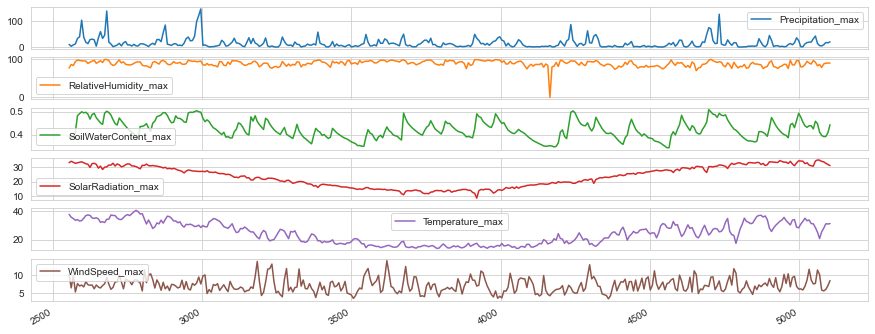

In [8]:
# multivariate analysis for 2016 - max
data_df_NSW_2016 = df_NSW_2016[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2016.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2007 <a class="anchor" id="2007"></a>

In [9]:
# lets plot multivariate analysis for a single year
df_NSW_2007 = df_NSW[df_NSW["year"] == 2007]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

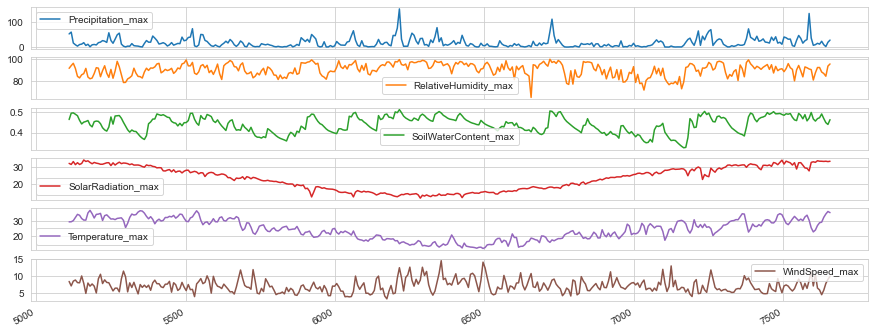

In [10]:
# multivariate analysis for 2007 - max
data_df_NSW_2007 = df_NSW_2007[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2007.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2008 <a class="anchor" id="2008"></a>

In [11]:
# lets plot multivariate analysis for a single year
df_NSW_2008 = df_NSW[df_NSW["year"] == 2008]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

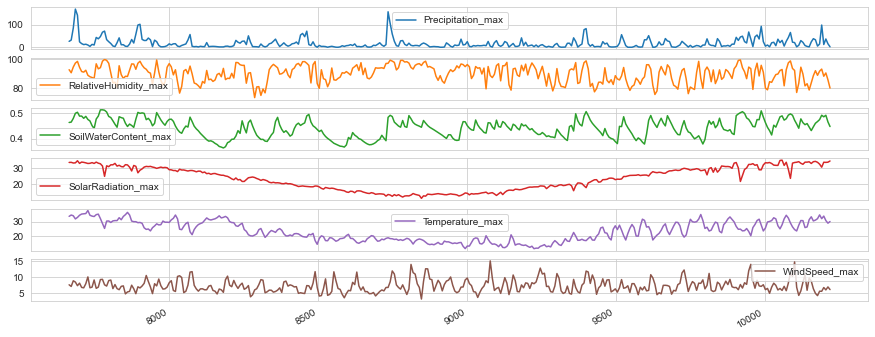

In [12]:
# multivariate analysis for 2008 - max
data_df_NSW_2008 = df_NSW_2008[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2008.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2009 <a class="anchor" id="2009"></a>

In [13]:
# lets plot multivariate analysis for a single year
df_NSW_2009 = df_NSW[df_NSW["year"] == 2009]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

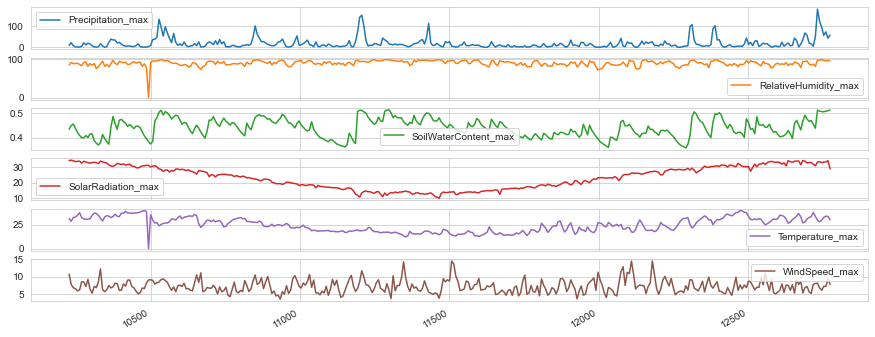

In [14]:
# multivariate analysis for 2009 - max
data_df_NSW_2009 = df_NSW_2009[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2009.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2010 <a class="anchor" id="2010"></a>

In [15]:
# lets plot multivariate analysis for a single year
df_NSW_2010 = df_NSW[df_NSW["year"] == 2010]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

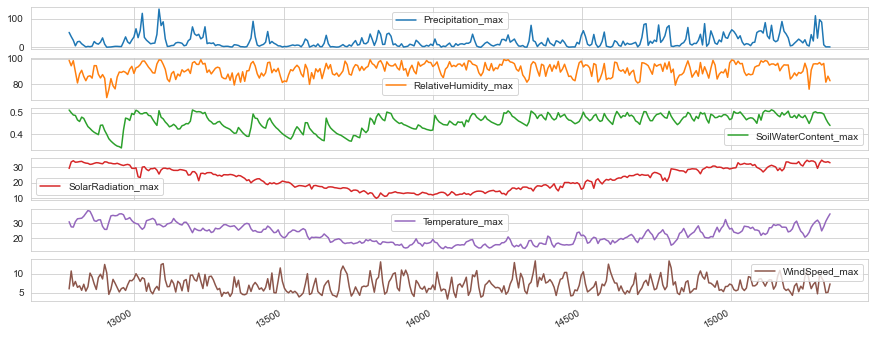

In [16]:
# multivariate analysis for 2010 - max
data_df_NSW_2010 = df_NSW_2010[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2010.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2011 <a class="anchor" id="2011"></a>

In [17]:
# lets plot multivariate analysis for a single year
df_NSW_2011 = df_NSW[df_NSW["year"] == 2011]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

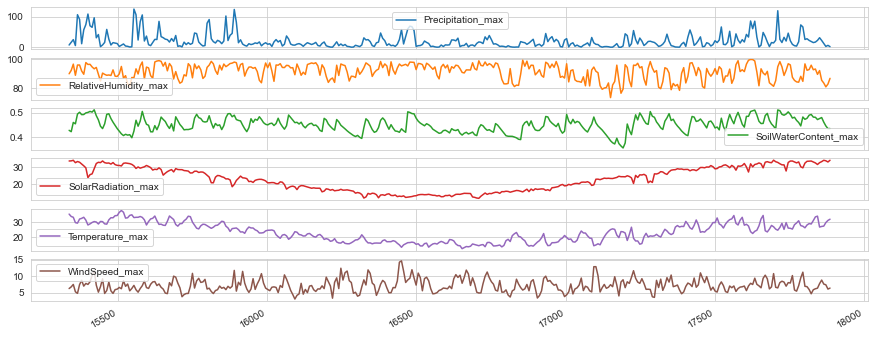

In [18]:
# multivariate analysis for 2011 - max
data_df_NSW_2011 = df_NSW_2011[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2011.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2012 <a class="anchor" id="2012"></a>

In [19]:
# lets plot multivariate analysis for a single year
df_NSW_2012 = df_NSW[df_NSW["year"] == 2012]


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

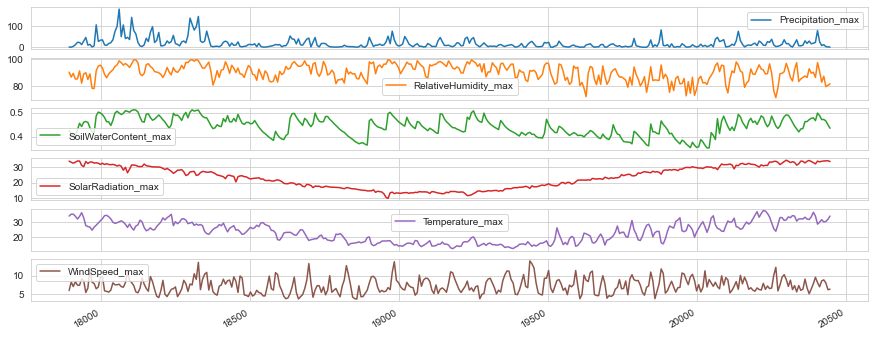

In [20]:
# multivariate analysis for 2012 - max
data_df_NSW_2012 = df_NSW_2012[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2012.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2013 <a class="anchor" id="2013"></a>

In [21]:
# lets plot multivariate analysis for a single year
df_NSW_2013 = df_NSW[df_NSW["year"] == 2013]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

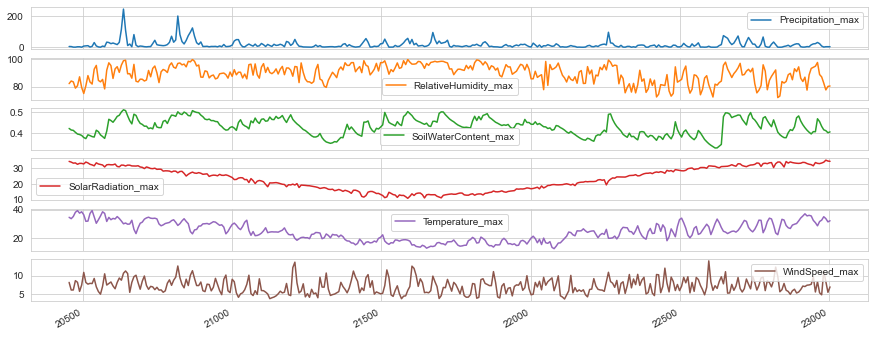

In [22]:
# multivariate analysis for 2013 - max
data_df_NSW_2013 = df_NSW_2013[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2013.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2014 <a class="anchor" id="2014"></a>

In [23]:
# lets plot multivariate analysis for a single year
df_NSW_2014 = df_NSW[df_NSW["year"] == 2014]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

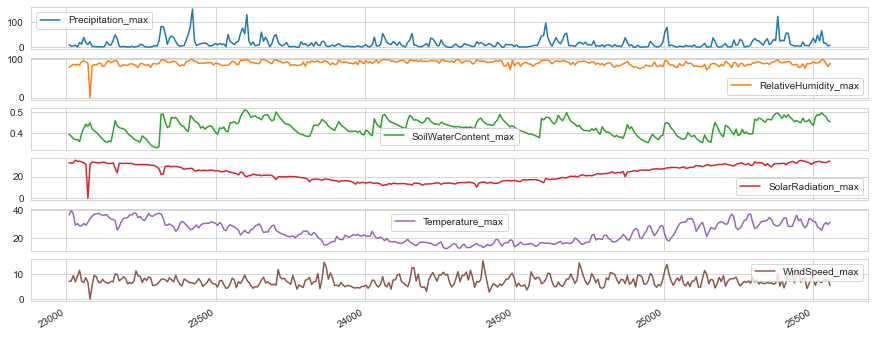

In [24]:
# multivariate analysis for 2014 - max
data_df_NSW_2014 = df_NSW_2014[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2014.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2015 <a class="anchor" id="2015"></a>

In [25]:
# lets plot multivariate analysis for a single year
df_NSW_2015 = df_NSW[df_NSW["year"] == 2015]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

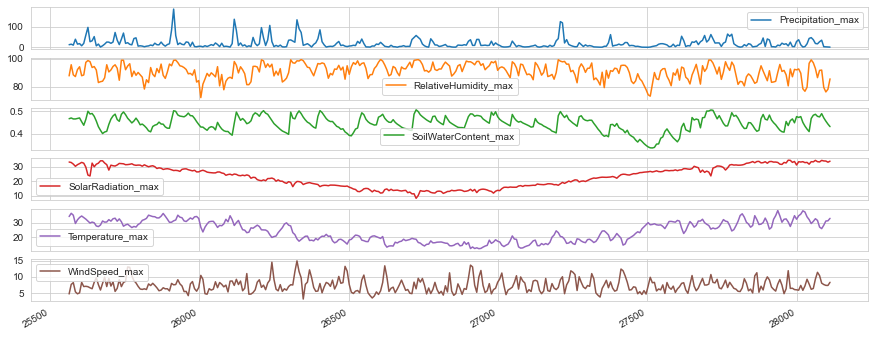

In [26]:
# multivariate analysis for 2015 - max
data_df_NSW_2015 = df_NSW_2015[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2015.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2016 <a class="anchor" id="2016"></a>

In [27]:
# lets plot multivariate analysis for a single year
df_NSW_2016 = df_NSW[df_NSW["year"] == 2016]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

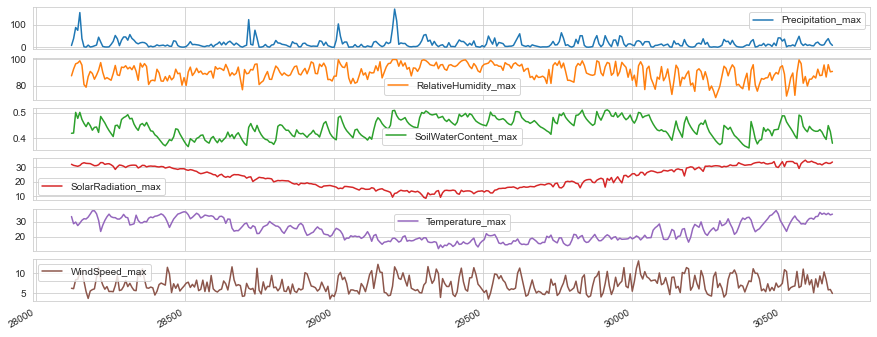

In [28]:
# multivariate analysis for 2016 - max
data_df_NSW_2016 = df_NSW_2016[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2016.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2017 <a class="anchor" id="2017"></a>

In [29]:
# lets plot multivariate analysis for a single year
df_NSW_2017 = df_NSW[df_NSW["year"] == 2017]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

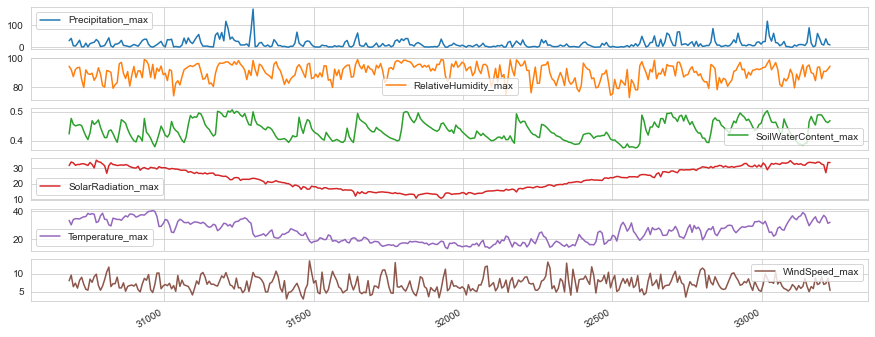

In [31]:
# multivariate analysis for 2017 - max
data_df_NSW_2017 = df_NSW_2017[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2017.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2018 <a class="anchor" id="2018"></a>

In [32]:
# lets plot multivariate analysis for a single year
df_NSW_2018 = df_NSW[df_NSW["year"] == 2018]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

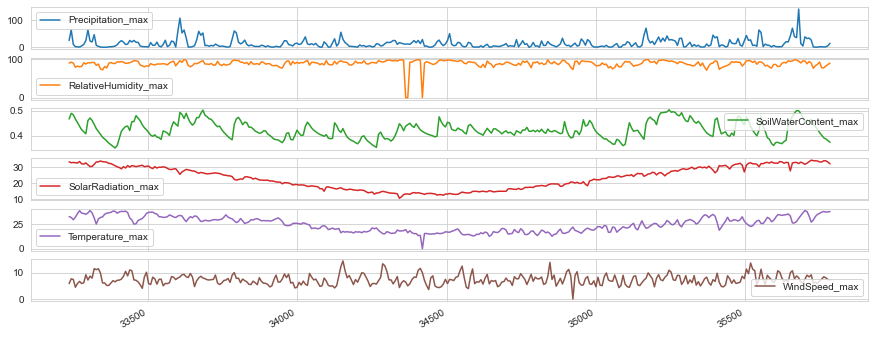

In [33]:
# multivariate analysis for 2018 - max
data_df_NSW_2018 = df_NSW_2018[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2018.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2019 <a class="anchor" id="2019"></a>

In [34]:
# lets plot multivariate analysis for a single year
df_NSW_2019 = df_NSW[df_NSW["year"] == 2019]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

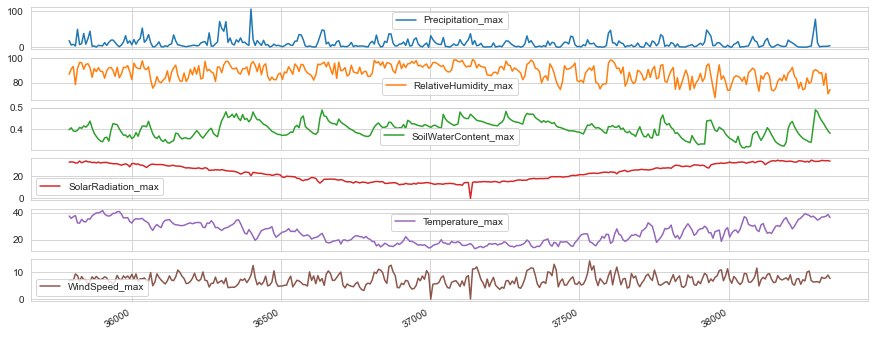

In [35]:
# multivariate analysis for 2019 - max
data_df_NSW_2019 = df_NSW_2019[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2019.plot(subplots = True, figsize = (15, 6))

### NSW Region - 2020 <a class="anchor" id="2020"></a>

In [36]:
# lets plot multivariate analysis for a single year
df_NSW_2020 = df_NSW[df_NSW["year"] == 2020]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

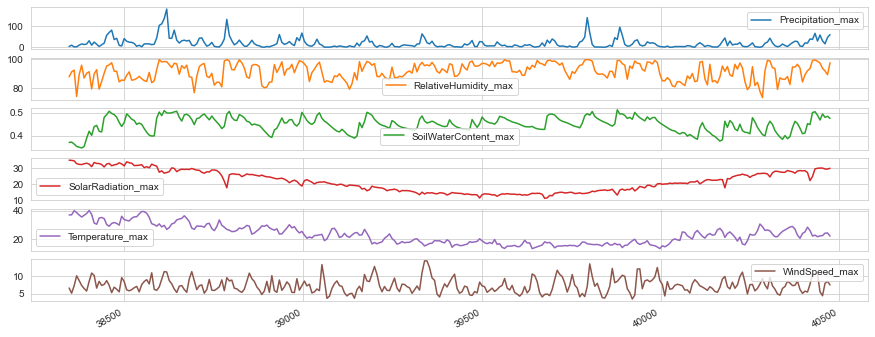

In [37]:
# multivariate analysis for 2020 - max
data_df_NSW_2020 = df_NSW_2020[["Precipitation_max", 
                                "RelativeHumidity_max", 
                                "SoilWaterContent_max", 
                                "SolarRadiation_max", 
                                "Temperature_max", "WindSpeed_max"]]
data_df_NSW_2020.plot(subplots = True, figsize = (15, 6))